# <식신>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', 500)
pd.options.display.max_rows;

In [2]:
def plot_barh(x,w,h):
    plt.figure(figsize=(w,h))
    x.plot(kind='barh')
    plt.show()

In [3]:
df1 = pd.read_csv('../data/데이터_식신/SSN000029_KDX_Bigcontest_data_Jan.csv', encoding='cp949')
df2 = pd.read_csv('../data/데이터_식신/SSN000029_KDX_Bigcontest_data_Feb.csv', encoding='cp949')
df3 = pd.read_csv('../data/데이터_식신/SSN000029_KDX_Bigcontest_data_Mar.csv', encoding='cp949')
df = pd.concat([df1,df2,df3],ignore_index=True)
df.shape

(29939, 11)

In [130]:
df.LOG_DATE.value_counts().sort_index()

20210101    371
20210102    384
20210103    350
20210104    259
20210105    309
20210106    252
20210107    236
20210108    265
20210109    319
20210110    345
20210111    301
20210112    323
20210113    296
20210114    348
20210115    407
20210116    419
20210117    445
20210118    332
20210119    295
20210120    307
20210121    346
20210122    389
20210123    398
20210124    396
20210125    289
20210126    318
20210127    278
20210128    290
20210129    341
20210130    372
20210131    348
20210201    349
20210202    275
20210203    313
20210204    305
20210205    370
20210206    464
20210207    378
20210208    295
20210209    329
20210210    306
20210211    324
20210212    340
20210213    479
20210214    355
20210215    325
20210216    358
20210217    298
20210218    346
20210219    437
20210220    413
20210221    324
20210222     24
20210223     92
20210224     94
20210225    323
20210226    415
20210227    475
20210228    491
20210301    457
20210302    276
20210303    332
20210304

In [152]:
df.INQ_CNT.value_counts().sort_index()

1        47
2     25980
3        71
4      2969
5         6
6       562
7         2
8       192
10       66
11        1
12       24
14        6
15        1
16        3
18        2
22        2
26        1
30        2
46        1
48        1
Name: INQ_CNT, dtype: int64

In [7]:
df.LOG_CITY_NM.value_counts()

Seoul              9943
Busan              3174
Gunsan-si          2856
Mokpo-si           2195
Gwangju            1317
Tongyeong-si       1071
Daegu               900
Daejeon             601
Jeonju-si           594
Incheon             432
Muan-gun            391
Geoje-si            329
Iksan               279
Yeongam-gun         241
Gimhae-si           239
Yongin-si           228
Ulsan               220
Seongnam-si         204
Haman-gun           203
Suwon-si            186
Goyang-si           182
Hwaseong-si         178
Cheongju-si         141
Cheonan-si          140
Anyang              130
Pyeongtaek-si       100
Haenam-gun           99
Bucheon-si           97
Jinju-si             96
Ansan-si             94
Namyangju-si         92
Jeju-si              92
Pohang-si            79
Gimje-si             75
Wonju-si             74
Seocheon-gun         70
Siheung-si           70
Yeosu-si             69
Gongju-si            68
Jindo-gun            67
Suncheon-si          60
Cheongwon-gun   

In [5]:
df.ADDR

0                전라북도 군산시 중정길 11
1                전라북도 군산시 미제길 41
2                 전라북도 군산시 부곡로 6
3             전라북도 군산시 동메2길 32-4
4               전라북도 군산시 해망로 224
                  ...           
29934      경상남도 통영시 용남면 화포2길 152
29935      경상남도 통영시 용남면 견내량로 113
29936    경상남도 통영시 광도면 죽림1로 41-23
29937           경상남도 통영시 무전5길 18
29938           경상남도 통영시 무전5길 18
Name: ADDR, Length: 29939, dtype: object

In [6]:
df.PLC_NM.value_counts()

하당먹거리       205
장미칼국수       204
군산횟집        176
씨엘비베이커리     161
장터식당        156
           ... 
불땡국수 지곡점      1
새목화식당         1
팬브레드 군산점      1
베니스바닷가재       1
최가밥상          1
Name: PLC_NM, Length: 5520, dtype: int64

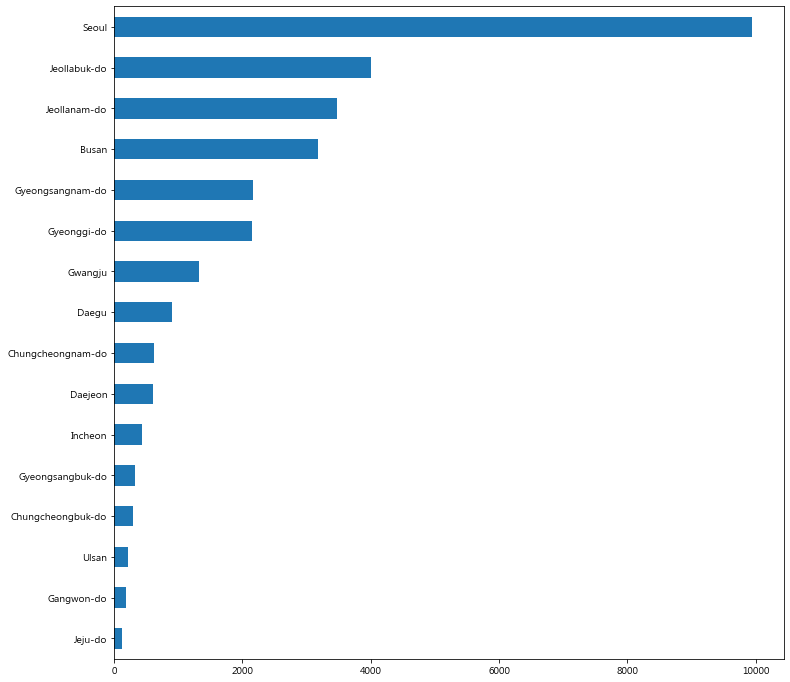

In [4]:
log_area = df.LOG_AREA_NM.value_counts(ascending=True)

plot_barh(log_area,12,12)

### 군산 통영 목포 나누기

In [4]:
df_gs = df.iloc[:3852]
df_mp = df.iloc[3852:7613]
df_ty = df.iloc[7613:]
len(df_gs)+len(df_mp)+len(df_ty)-len(df) # 검산

0

## 군산 목포 통영 음식업종별 조회수

In [5]:
def data(df_city):
    temp1 = df_city.iloc[:,[5,6,9]].drop_duplicates()
    temp2 = df_city.pivot_table(values='INQ_CNT',index='PLC_NM',aggfunc='sum').sort_values(by='INQ_CNT',ascending=False)
    temp3 = temp2.merge(temp1,left_index=True,right_on='PLC_NM')
    temp4 = temp3.pivot_table(index='SKSN_CGR_SCLS_NM',values='INQ_CNT',aggfunc='sum').sort_values(by='INQ_CNT')
    temp5 = round(100*temp4/temp4.sum(),1)
    temp6 = temp5.rename_axis(index=None)
    temp6.columns = ['조회비율']
    return temp6

In [6]:
food_cate_gsmpty = pd.concat([data(df),data(df_gs),data(df_mp),data(df_ty)],axis=1).fillna(0)
food_cate_gsmpty.columns=['전체','군산','목포','통영']

[Text(0.5, 0, '비율(%)'), Text(0.5, 1.0, '관광도시별 음식조회비율')]

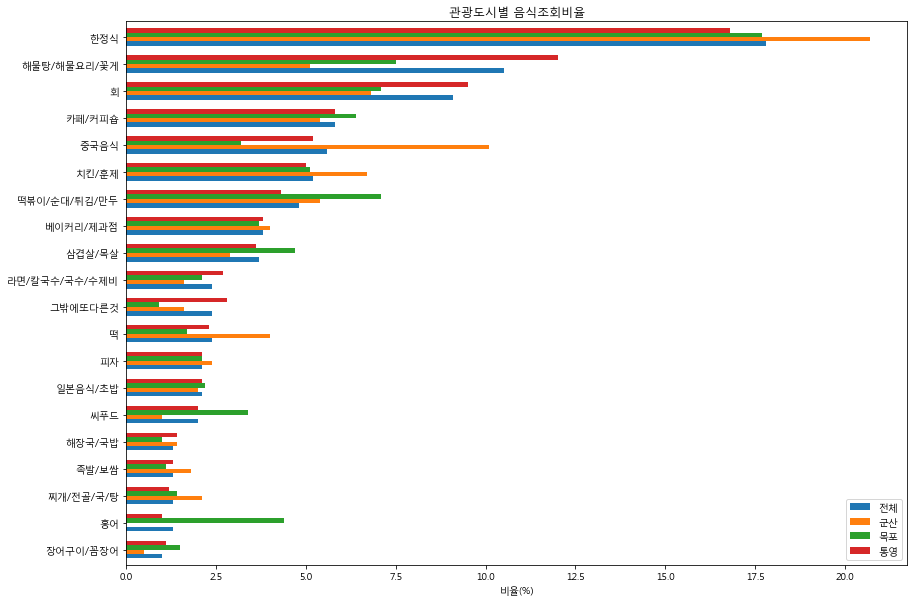

In [11]:
ax = food_cate_gsmpty.iloc[-20:].plot( kind='barh', figsize=(14,10), width=0.65)
ax.set(xlabel='비율(%)', title='관광도시별 음식조회비율' )
#ax.get_figure().savefig('plots/asdf.pdf', format='pdf')

## 군산의 식당 공급/조회수 중 고군산군도 비중

In [12]:
# 고군산 군도는 모두 "옥도면"이 주소에 들어가 있음!
ggs = df_gs[df_gs.ADDR.str.contains('옥도면')]

### 관광객의 군산 식당 조회수 중 고군산군도 비중 (군산 외지인의 특정 식당 조회수)

In [13]:
# 군산 외부에서의 검색을 관광객으로 추정
gs_out = df_gs[df_gs.LOG_CITY_NM!='Gunsan-si']
ggs_out = ggs[ggs.LOG_CITY_NM!='Gunsan-si']

In [14]:
군산시식당조회수 = gs_out.INQ_CNT.sum()
고군산식당조회수 = ggs_out.INQ_CNT.sum()

In [15]:
print('외지인이 조회한 군산 식당의',round(100* 고군산식당조회수/군산시식당조회수,2),'%가 고군산군도에 위치합니다. ')

외지인이 조회한 군산 식당의 3.25 %가 고군산군도에 위치합니다. 


### 고군산군도/군산전체 식당공급 (소상공인진흥공단 상가데이터)

In [16]:
dt = pd.read_csv('../data/소상공인시장진흥공단_상가(상권)정보_전북_202106.csv', encoding='UTF8')
dt = dt[dt.도로명주소.str.contains('군산')]

F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
dt_food = dt[dt.상권업종대분류명=='음식']

In [18]:
# 등록된 군산의 식당 개수
n_food_gs = len(dt_food)

In [19]:
# 등록된 고군산군도의 카페업종 개수
dt_ggs = dt[dt.도로명주소.str.contains('옥도면')]
n_food_ggs = len(dt_ggs)

In [20]:
print('군산 식당의',round(100* n_food_ggs/n_food_gs,2),'%가 고군산군도에 위치합니다. ')

군산 식당의 3.8 %가 고군산군도에 위치합니다. 


## 식당 공급/조회수 중 고군산군도 비중 파이차트

In [21]:
r_food_click_ggs = round(100* 고군산식당조회수/군산시식당조회수,2)
r_food_click_inland = 100-round(100* 고군산식당조회수/군산시식당조회수,2)

In [22]:
r_food_num_ggs = round(100* n_food_ggs/n_food_gs,2)
r_food_num_inland = 100-round(100* n_food_ggs/n_food_gs,2)

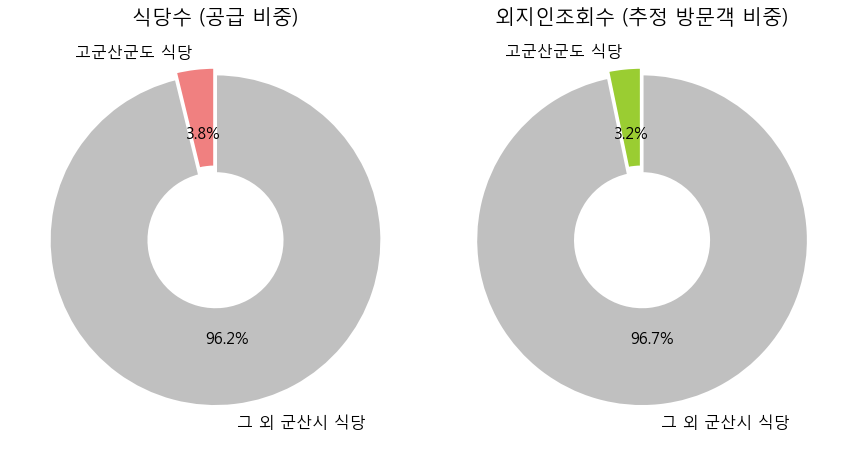

In [23]:
plt.rcParams['figure.figsize'] = [12, 8]
group_names = ['고군산군도 식당','그 외 군산시 식당']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.02, 0.02]#, 0.02, 0.02, 0.02]

fig, axes = plt.subplots(1,2)

#fig.suptitle('군산시 식당의 개수와 조회수에서 고군산군도가 차지하는 비중',fontsize=25)
axes[0].set_title('식당수 (공급 비중)',{'fontsize':20})
axes[1].set_title('외지인조회수 (추정 방문객 비중)',{'fontsize':20})

axes[0].pie([r_food_num_ggs,r_food_num_inland], 
        labels=group_names, 
        colors=['lightcoral','silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size

axes[1].pie([r_food_click_ggs,r_food_click_inland], 
        labels=group_names, 
        colors= ['yellowgreen', 'silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size

fig.tight_layout()

#plt.axis('equal')
#plt.show()

## 군산의 카페 공급/조회수 중 고군산군도 비중

### 관광객의 군산 카페 조회수 중 고군산군도 비중 (군산 외지인의 특정 카페 조회수)

In [25]:
gs_out = df_gs[df_gs.LOG_CITY_NM!='Gunsan-si']
ggs_out = ggs[ggs.LOG_CITY_NM!='Gunsan-si']

In [26]:
군산시카페조회수 = gs_out[gs_out.SKSN_CGR_SCLS_NM=='카페/커피숍'].INQ_CNT.sum()
고군산카페조회수 = ggs_out[ggs_out.SKSN_CGR_SCLS_NM=='카페/커피숍'].INQ_CNT.sum()

In [27]:
print('외지인이 조회한 군산 카페의',round(100* 고군산카페조회수/군산시카페조회수,2),'%가 고군산군도에 위치합니다. ')

외지인이 조회한 군산 카페의 7.27 %가 고군산군도에 위치합니다. 


### 고군산군도/군산내지 카페공급 (소상공인진흥공단 상가데이터)

In [30]:
dt = pd.read_csv('../data/소상공인시장진흥공단_상가(상권)정보_전북_202106.csv', encoding='UTF8')
dt = dt[dt.도로명주소.str.contains('군산')]

In [31]:
# 등록된 군산의 카페업종 개수
n_cafe_gs = len(dt[dt.상권업종소분류명.str.contains('카페')])

In [32]:
# 등록된 고군산군도의 카페업종 개수
dt_ggs = dt[dt.도로명주소.str.contains('옥도면')]
n_cafe_ggs = len(dt_ggs[dt_ggs.상권업종소분류명.str.contains('카페')])

In [33]:
print('군산 카페의',round(100* n_cafe_ggs/n_cafe_gs,2),'%가 고군산군도에 위치합니다. ')

군산 카페의 2.26 %가 고군산군도에 위치합니다. 


## 카페 공급/조회수 중 고군산군도 비중 파이차트

In [34]:
r_cafe_click_ggs = round(100* 고군산카페조회수/군산시카페조회수,2)
r_cafe_click_inland = 100-round(100* 고군산카페조회수/군산시카페조회수,2)

In [35]:
r_cafe_num_ggs = round(100* n_cafe_ggs/n_cafe_gs,2)
r_cafe_num_inland = 100-round(100* n_cafe_ggs/n_cafe_gs,2)

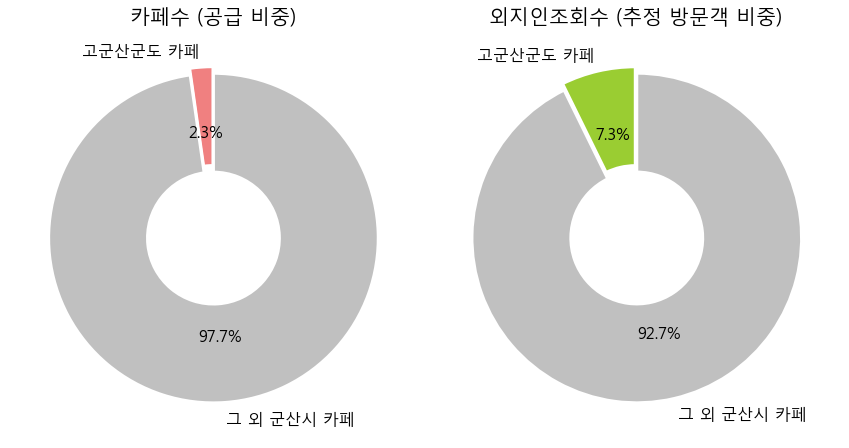

In [36]:
plt.rcParams['figure.figsize'] = [12, 8]
group_names = ['고군산군도 카페','그 외 군산시 카페']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.02, 0.02]#, 0.02, 0.02, 0.02]

fig, axes = plt.subplots(1,2)

#fig.suptitle('군산시 카페의 개수와 조회수에서 고군산군도가 차지하는 비중',fontsize=25)
axes[0].set_title('카페수 (공급 비중)',{'fontsize':20})
axes[1].set_title('외지인조회수 (추정 방문객 비중)',{'fontsize':20})



axes[1].pie([r_cafe_click_ggs,r_cafe_click_inland], 
        labels=group_names, 
        colors= ['yellowgreen', 'silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size

axes[0].pie([r_cafe_num_ggs,r_cafe_num_inland], 
        labels=group_names, 
        colors=['lightcoral','silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size
fig.tight_layout()

#plt.axis('equal')
#plt.show()

## 수산시장

### 도시별 수산시장 관심도 (네이버 데이터랩 검색량 기준)

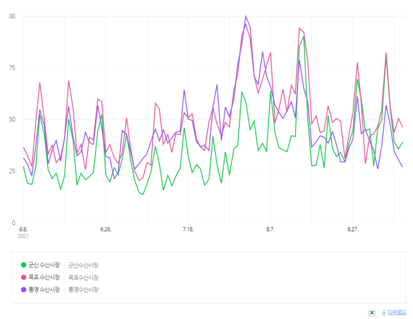

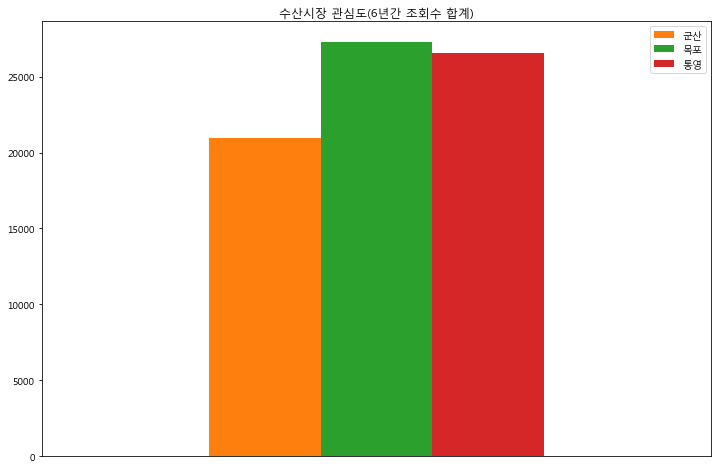

In [37]:
plot = pd.DataFrame([20948,27269,26548],index=['군산','목포','통영']).T.\
plot(kind='bar',title='수산시장 관심도(6년간 조회수 합계)',color=[ '#ff7f0e', '#2ca02c', '#d62728' ],xticks=[])
plot.get_figure()
plt.savefig('plots/수산시장 관심도.pdf')

### 새만금수산시장(비응로) 식당 조회수

In [54]:
temp1 = df.iloc[:,[5,6,9]].drop_duplicates()
temp2 = df.pivot_table(values='INQ_CNT',index='PLC_NM',aggfunc='sum').sort_values(by='INQ_CNT',ascending=False)
temp3 = temp2.merge(temp1,left_index=True,right_on='PLC_NM')
temp4 = temp3[temp3.ADDR.str.contains('비응')]

In [55]:
군산총조회수 = df_gs.pivot_table(values='INQ_CNT',index='PLC_NM',aggfunc='sum').sum()
#비응총조회수 = temp4.INQ_CNT.sum()
비응총조회수 = df[df.ADDR.str.contains('비응')].iloc[:,[1,5,6,9]].INQ_CNT.sum()
비응항조회비율 = 100*(비응총조회수/군산총조회수)[0]

<AxesSubplot:ylabel='SKSN_CGR_SCLS_NM'>

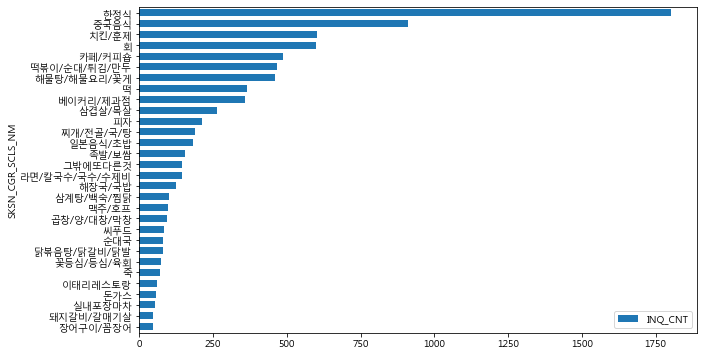

In [56]:
df_gs.pivot_table(values='INQ_CNT',index='SKSN_CGR_SCLS_NM',aggfunc='sum').sort_values(by='INQ_CNT').iloc[-30:]\
.plot( kind='barh', figsize=(10,6), width=0.65)

<AxesSubplot:title={'center':'새만금종합수산시장 업종별 식당 조회수'}>

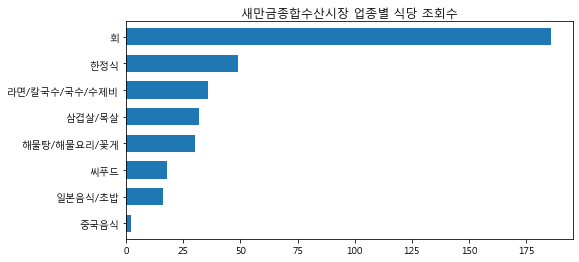

In [57]:
temp = df[df.ADDR.str.contains('비응')].iloc[:,[1,5,6,9]].pivot_table(index='SKSN_CGR_SCLS_NM',values='INQ_CNT',aggfunc='sum')
temp = temp.rename_axis(index=None)
temp.columns = ['조회수']
temp.sort_values(by='조회수').plot( kind='barh', figsize=(8,4), width=0.65, title='새만금종합수산시장 업종별 식당 조회수', legend=None)

In [58]:
tempa = df_gs.pivot_table(values='INQ_CNT',index='SKSN_CGR_SCLS_NM',aggfunc='sum').sort_values(by='INQ_CNT').iloc[-30:]
temp1 = tempa.loc['회'] + tempa.loc['해물탕/해물요리/꽃게'] + tempa.loc['씨푸드']
tempb = df[df.ADDR.str.contains('비응')].iloc[:,[1,5,6,9]].pivot_table(index='SKSN_CGR_SCLS_NM',values='INQ_CNT',aggfunc='sum')
temp2 = tempb.loc['회'] + tempb.loc['해물탕/해물요리/꽃게'] + tempb.loc['씨푸드']
temp3 = round(float(100*(temp2/temp1)),1)

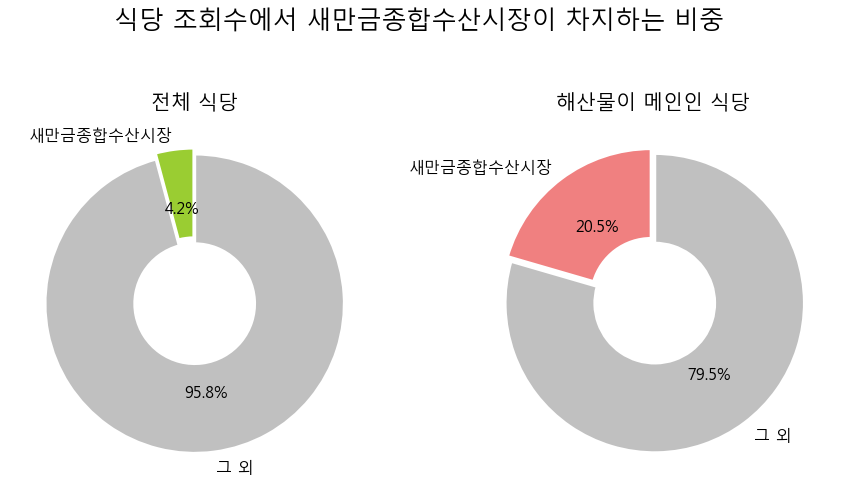

In [59]:
plt.rcParams['figure.figsize'] = [12, 8]
group_names = ['새만금종합수산시장','그 외']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.02, 0.02]#, 0.02, 0.02, 0.02]

fig, axes = plt.subplots(1,2)

fig.suptitle('식당 조회수에서 새만금종합수산시장이 차지하는 비중',fontsize=25)
axes[0].set_title('전체 식당',{'fontsize':20})
axes[1].set_title('해산물이 메인인 식당',{'fontsize':20})

axes[0].pie([비응항조회비율,100-비응항조회비율], 
        labels=group_names, 
        colors= ['yellowgreen', 'silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size

axes[1].pie([temp3,100-temp3], 
        labels=group_names, 
        colors=['lightcoral','silver'], 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size
fig.tight_layout()

#plt.axis('equal')
#plt.show()